In [17]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np

classes_info_array = []

for scene_number in range(1, 24):
    json_path = Path(fr'D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-{scene_number}\camera_01\camera_01__annotation')
    
    if not json_path.exists():
        print(f"Path does not exist: {json_path}")
        continue

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array.append(items['category_id'])

count_dict = {
    'adult': classes_info_array.count(1),
    'car': classes_info_array.count(6),
    'bicycle': classes_info_array.count(4),
    'motorcycle': classes_info_array.count(5),
    'group': classes_info_array.count(3),
    'bus': classes_info_array.count(7),
}



Path does not exist: D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-11\camera_01\camera_01__annotation
Path does not exist: D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-12\camera_01\camera_01__annotation
Path does not exist: D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-13\camera_01\camera_01__annotation


In [ ]:
plt.bar(list(count_dict.keys()), list(count_dict.values()), color='red', width=0.4)
plt.xlabel('class')
plt.ylabel('count')

In [19]:
def instance_counter(object_list):
    
    count_dict_one_scene = {
    'adult': object_list.count(1),
    'car' : object_list.count(6),
    'bicycle' : object_list.count(4),
    'motorcycle' : object_list.count(5),
    'bus' : object_list.count(7),
    }

    return count_dict_one_scene

In [ ]:
stats_dict = {

}
             
for scene_number in [x for x in range(1, 26) if x not in [11, 12, 13]]:
    json_path = Path(fr'D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-{scene_number}\camera_01\camera_01__annotation')
    classes_info_array_for_one_scene = []

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array_for_one_scene.append(items['category_id'])
                
        

    count = instance_counter(classes_info_array_for_one_scene)
    stats_dict[f'scene {scene_number}'] = count



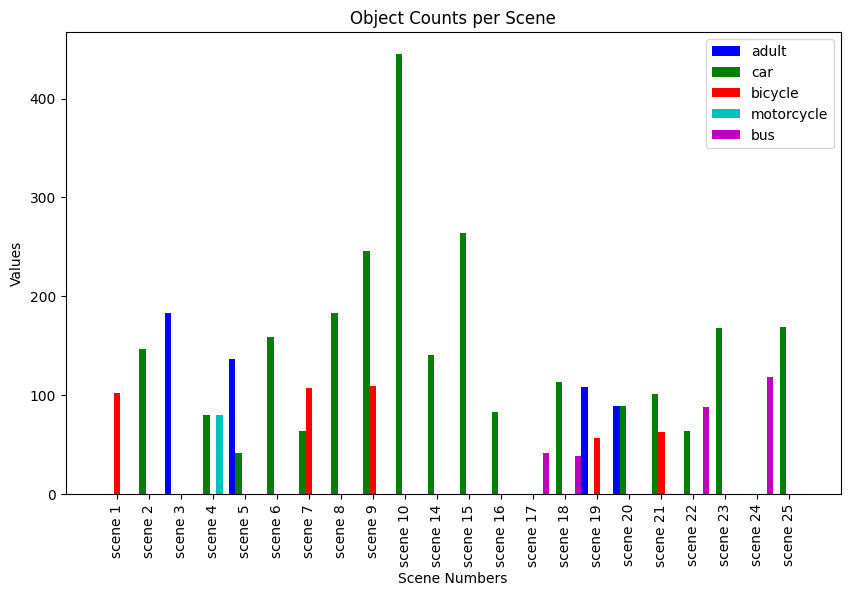

In [21]:

scene_numbers = list(stats_dict.keys())

# Extract object types and their values
objects = list(next(iter(stats_dict.values())).keys())
values = {obj: [stats_dict[scene][obj] for scene in scene_numbers] for obj in objects}

# Define the number of scenes and the width of each bar
n_scenes = len(scene_numbers)
bar_width = 0.6
group_width = bar_width * (len(objects) + 0)  # Adjust group width to add space between scenes

# Create a bar chart with a larger figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of the bars
indices = np.arange(n_scenes) * group_width

# Colors for each object
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each object's bars with unique color
for i, (obj, color) in enumerate(zip(objects, colors)):
    ax.bar(indices + i * bar_width, values[obj], bar_width, label=obj, color=color)

# Set the labels and title
ax.set_xlabel('Scene Numbers')
ax.set_ylabel('Values')
ax.set_title('Object Counts per Scene')
ax.set_xticks(indices + bar_width * (len(objects) - 1) / 2)
ax.set_xticklabels(scene_numbers, rotation=90)
ax.legend()

# Display the plot
plt.show()


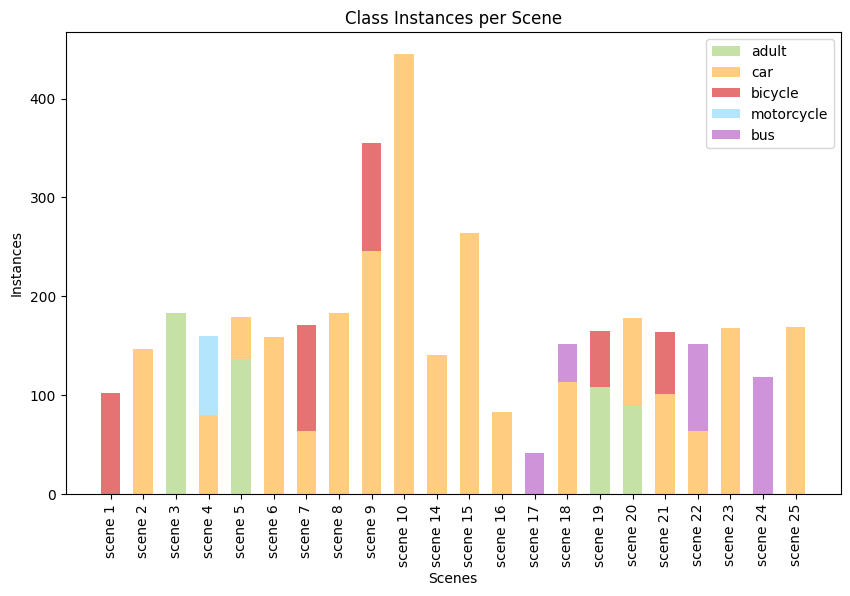

In [27]:
scene_numbers = list(stats_dict.keys())

# Extract object types and their values
objects = list(next(iter(stats_dict.values())).keys())
values = {obj: [stats_dict[scene][obj] for scene in scene_numbers] for obj in objects}

# Create a stacked bar chart with a larger figure size
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

# Set the positions of the bars
indices = np.arange(len(scene_numbers))

# Colors for each object
colors = ['#C5E1A5', '#FFCC80', '#E57373', '#B3E5FC', '#CE93D8', 'y']

# Plot each object's bars stacked on top of each other
bottom_values = np.zeros(len(scene_numbers))
for i, (obj, color) in enumerate(zip(objects, colors)):
    ax.bar(indices, values[obj], bar_width, label=obj, color=color, bottom=bottom_values)
    bottom_values += np.array(values[obj])

# Set the y-axis limit with padding
ax.set_ylim(0, bottom_values.max() * 1.05)

# Set the labels and title
ax.set_xlabel('Scenes')
ax.set_ylabel('Instances')
ax.set_title('Class Instances per Scene')
ax.set_xticks(indices)
ax.set_xticklabels(scene_numbers, rotation=90)
ax.legend()

# Display the plot
plt.show()

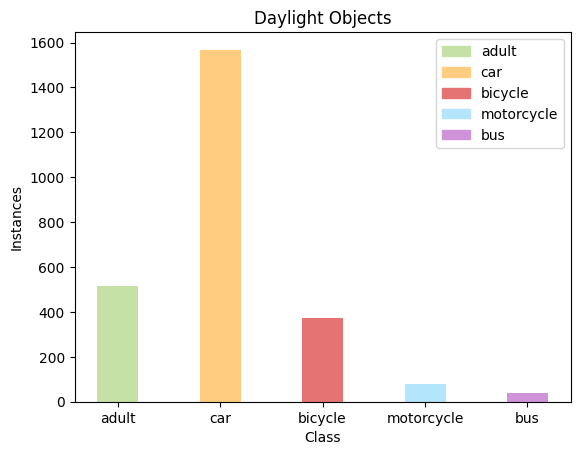

In [29]:
classes_info_array = []

for scene_number in list(range(1, 11)) + [18, 19, 20]:
    json_path = Path(fr'D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-{scene_number}\camera_01\camera_01__annotation')

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array.append(items['category_id'])

# Calculate counts from classes_info_array
count_dict = {
    'adult': classes_info_array.count(1),
    'car': classes_info_array.count(6),
    'bicycle': classes_info_array.count(4),
    'motorcycle': classes_info_array.count(5),
    'bus': classes_info_array.count(7),
}

# Filter out classes with zero count
filtered_count_dict = {key: value for key, value in count_dict.items() if value != 0}

# New color list
colors = ['#C5E1A5', '#FFCC80', '#E57373', '#B3E5FC', '#CE93D8']

plt.bar(list(filtered_count_dict.keys()), list(filtered_count_dict.values()), color=colors, width=0.4)
plt.xlabel('Class')
plt.ylabel('Instances')
plt.title('Daylight Objects')

# Create legend handles
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(handles, filtered_count_dict.keys())  # Specify legend handles and labels
plt.show()

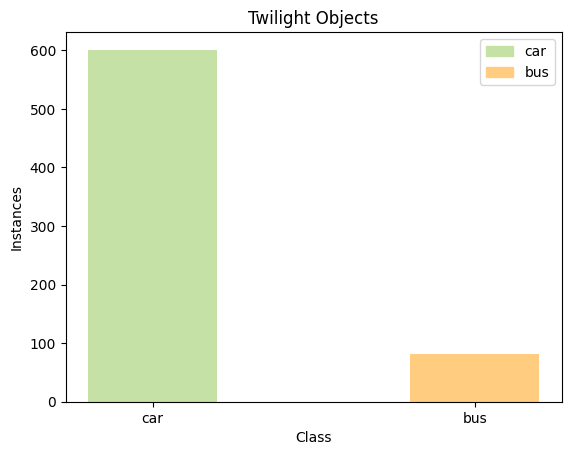

In [30]:
classes_info_array = []

for scene_number in range(14, 19):
    json_path = Path(fr'D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-{scene_number}\camera_01\camera_01__annotation')

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array.append(items['category_id'])

# Calculate counts from classes_info_array
count_dict = {
    'adult': classes_info_array.count(1),
    'car': classes_info_array.count(6),
    'bicycle': classes_info_array.count(4),
    'motorcycle': classes_info_array.count(5),
    'bus': classes_info_array.count(7),
}

# Filter out classes with zero count
filtered_count_dict = {key: value for key, value in count_dict.items() if value != 0}

# New color list
colors = ['#C5E1A5', '#FFCC80', '#E57373', '#B3E5FC', '#CE93D8']

plt.bar(list(filtered_count_dict.keys()), list(filtered_count_dict.values()), color=colors, width=0.4)
plt.xlabel('Class')
plt.ylabel('Instances')
plt.title('Twilight Objects')

# Create legend handles
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(handles, filtered_count_dict.keys())  # Specify legend handles and labels
plt.show()

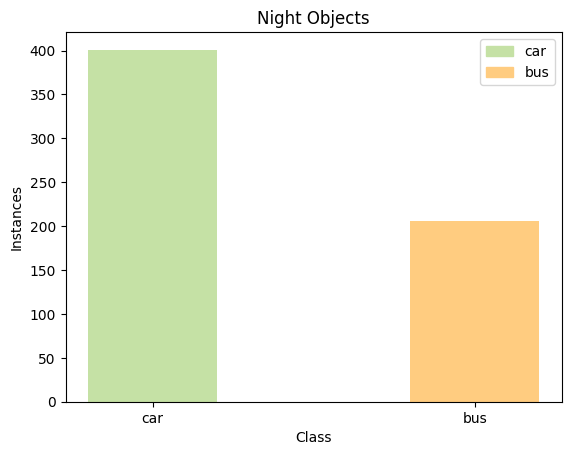

In [31]:
classes_info_array = []

for scene_number in range(22, 26):
    json_path = Path(fr'D:\AUF-SEM 2\Project\Python\pythonProject3\INFRA-3DRC_scene-{scene_number}\camera_01\camera_01__annotation')

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array.append(items['category_id'])

# Calculate counts from classes_info_array
count_dict = {
    'adult': classes_info_array.count(1),
    'car': classes_info_array.count(6),
    'bicycle': classes_info_array.count(4),
    'motorcycle': classes_info_array.count(5),
    'bus': classes_info_array.count(7),
}

# Filter out classes with zero count
filtered_count_dict = {key: value for key, value in count_dict.items() if value != 0}

# New color list
colors = ['#C5E1A5', '#FFCC80', '#E57373', '#B3E5FC', '#CE93D8']

plt.bar(list(filtered_count_dict.keys()), list(filtered_count_dict.values()), color=colors, width=0.4)
plt.xlabel('Class')
plt.ylabel('Instances')
plt.title('Night Objects')

# Create legend handles
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]

plt.legend(handles, filtered_count_dict.keys())  # Specify legend handles and labels
plt.show()